## Overview
Let's say you know the mean and standard deviation of a population. How can you tell if a sample is from this population or some other population? Although we may never know with 100% certainty, we can look for statistically significant differences between the sample statistics and the population paramters. This is done by first stating what is refered to as a null hypothesis, which in this scenario would be that there is no difference between the sample mean and the population mean. Then we look for statistical evidence to accept or reject the null hypothesis. What if we don't know the population parameters? After this notebook you will know:
* how to formulate a null hypothesis and alternative hypothesis for comparing a sample mean to a population mean.
* how to conduct a z-test using the z-statistic for the sample mean to gain statistical evidence to accept or reject the null hypothesis.
* how to one-sample, paired sample, and independent sample t-tests when the population standard deviation is unknown and must be estimated using the sample standard deviation.

There is a terrific set of tutorials on using SPSS to do hypothesis testing at [this Kent State University website](https://libguides.library.kent.edu/SPSS).

The following cell will import the WineEnthusiast data set using pandas. The data is linked to above and is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # some useful stuff
wine_data = pd.read_csv("winemag-data-130k-v2.csv")

## Is A Sample of Wine Scores From the Wine Enthusiast Population
Let's assume the WineEnthusiast point scores are interval-scaled normally distributed data. Let's find the population mean and population standard deviation.

In [3]:
points = wine_data['points']
mu = points.mean()
sigma = points.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  88.44713820775404 , sigma: 3.039718509014864


A sample of N=10 wine point scores yields a sample mean of x_bar = 90.2. Is this sample from the WineEnthusiast population? To test this question we will use what is refered to as a one-sample z-test. First we state the null hypothesis and alternative hypothesis like this;
* H<sub>0</sub>: The sample is from the WineEnthusiast population, x_bar = &mu;.
* H<sub>A</sub>: The sample is not from the WineEnthusiast population, x_bar != (not equal) &mu;.

Then, we specify a significance (alpha) level. Usually, statistical significance is associated with an alpha level of &alpha; = 0.05 or smaller. Next, we use a [z table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) to look up the critical z value that cooresponds to this &alpha; level. Here we are doing a two-tailed test because we don't care if the sample mean is greater than or less than the population mean. We just are testing to see if the two are equal or notl (see the alternative hypothesis above). Next we calculate the z-statitic for the sample mean compared to the population mean dividing by the standard deviation of the sample mean, which is the standard error &sigma;/sqrt(N). If this z-statistic is less than z-critical then we accept the null hypothesis, otherwise we reject the null and accept the alternative hypothesis. Let's do it.

In [4]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = 90.2
N = 10
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

1.8235358539098925


Since z_stat is less than z_critical we accept the null hypothesis and reject the althernative. Statistically, we say the sample mean is no different than the population mean and thus the sample is drawn from the population. But what if the sample size was larger? Let's redo the calculation with N=30.

In [5]:
N = 30;
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

3.1584567483954316


Now the z-statistic is greater than z-critical and we reject the null hypothesis. Statistically speaking we say that this sample was drawn from some different population than the WineEnthusiast population. Why the difference? As you can see mathematically, increasing the sample size decreases the standard error of the sample mean. This means the distribution of sample means becomes narrower as N gets larger and thus it is less likely to overlap with the population mean everything else being equal.

## T-Tests
Around 1900, a chemist and statistical wizard named William Sealy Gosset who went by the pen name Student worked for the Guiness Brewery in Ireland. in his mission to use science to make better beer, he noticed that in situations where the population standard deviation is unknown (most situations), it can be estimated using the sample standard deviation (using the unbiased version normalized by N-1). But, if the sample size is small (let's say less than 30 is small) the shape of the distribution of sample means has thicker tails than a normal distribution because there is more variability in the estimate of the standard deviation of the sample mean (the standard error), which itself depends on the sample size. Thus, the z-test is unreliable because z-values are determend using a normal distribuiton. Instead, we must draw our test statistic from a different distribution called the t-distribution. The shape of this distribution narrows and becomes more normal like and the sample size increases or degrees of freedom increases, where degrees of freedom is N-1. Thus, Student's t-test is conducted in a fashion similar to a z-test but the t-statistic is pulled from a different distribution and thus a different table. **The t-statistic itself has a similar form to the z-statistic in that it is a ration of a deviation divided by a measure of variability.** However, the exact for of the ratio for the t-statistic depends on the nature of the data being used. Next I'll show you how to apply Student's t-test to various experimental scenarios.

## Framework for Statistical Hypothesis Testing with T-Tests
* Do you have one sample that you want to compare to some spcified value? Do a **one-sample t-test**. For example, let's say it is well known that acorns have an average mass of 10 g, and you want to test to see if them mass of acorns from a forest subjected to acid rain are signifcantly different. 
* Do you have two independent samples that you want to compare to each other? Do an **independent samples t-test**. For example, let's say you take samples of acorn from a forest upwind and downwind from a coal power plant and you want to test to see if the average mass of the acorns from the two samples is the same.
* Do you have two dependent samples taken from the same indidividuals or objects? Do a **paired samples t-test**. For example, let's say you measure the average mass of acorns from 50 trees in a forest before and after the local power plant converted from coal to natural gas and want to see if there is a difference in the masses pre-conversion to post-conversion. 

In [6]:
x = np.random.normal(loc=9.2,scale=1.5,size=30).round(1)
print(x)

[ 8.  11.6  9.7  8.7  8.5  6.9  7.6  8.2  7.3  9.   9.6  9.2  8.3 10.3
  8.2 10.6  8.1  7.7  8.   9.7  9.7  9.6 11.7  8.5  9.1  9.7  8.3 11.3
  9.8 10.2]


## One-sample location test on whether the mean of a population is equal to a value specified in null hypothesis

The mass of a sample of N=20 acorns from a forest subjected to acid rain from a coal power plant are m = 8.8, 6.6, 9.5, 11.2, 10.2, 7.4, 8.0, 9.6, 9.9, 9.0, 7.6, 7.4, 10.4, 11.1, 8.5, 10.0, 11.6, 10.7, 10.3, and 7.0 g. Is the average mass of this sample different from the average mass of all acorns of &mu; = 10.0 g?

* H<sub>0</sub>: x&#772; - &mu; = 0, that is there is no difference between my sample mean and the value of &mu;.
* H<sub>a</sub>: x&#772; - &mu; &ne; 0 (two-sided test)
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)
* degrees of freedom: d<sub>f</sub> = N-1
* t-critical for specified alpha level: t<sub>*</sub> = 2.093
* t-statistic: t = (x&#772; - &mu;)/(s/sqrt(N)) where s is the sample standard deviation.


In [7]:
x = [8.8, 6.6, 9.5, 11.2, 10.2, 7.4, 8.0, 9.6, 9.9, 9.0,
     7.6, 7.4, 10.4, 11.1, 8.5, 10.0, 11.6, 10.7, 10.3, 7.0]
mu = 10
t_critical = 2.093
x_bar = np.array(x).mean()
s = np.array(x).std(ddof=1) # subtract 1 from N to get unbiased estimate of sample standard deviation
N = len(x)
SE = s/np.sqrt(N)
t = (x_bar - mu)/SE
print("t-statistic: ",t)

# a one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  -2.2491611580763977
t =  -2.2491611580763973 , p =  0.03655562279112415


Note that t is greater in magnitude that t<sub>*</sub> so there is a statistically significant difference at the &alpha; = 0.05 level between the sample mean and the stated population mean of 10 g. Note that statistical signficance doesn mean the effect is large. Let's report the 95% confidence intervals too.. 

In [8]:
# margin of error
err = t_critical*SE
x_low = x_bar - err
x_high = x_bar + err
print("x_bar = {}, 95% CI [{}, {}]".format(x_bar.round(2), x_low.round(2), x_high.round(2)))

# you can also get CIs by using the build int t-distribution function like this:
print("CI using scipy: ",stats.t.interval(0.95, N-1, loc=x_bar, scale=SE))

x_bar = 9.24, 95% CI [8.53, 9.95]
CI using scipy:  (8.532759313560822, 9.947240686439175)


## Independent (unpaird) two-sample location test with a null hypothesis that the means of the two samples are equal (equal variance assued).
The mass of N<sub>1</sub>=20 acorns from oak trees up wind from a coal power plant and N<sub>2</sub>=30 acorns from oak trees down wind from the same coal power plant are mesured. Are the acorns from trees downwind less massive then the ones from up wind? This will require a one-tail (on the low/left side) test. The sample sizes are not equal but we will assume that the population variance of sample 1 and sample 2 are equal. If we don't make the assumption of equal variance then we do a Welch's t-test.

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0, that is , there is no difference between the sample means
* H<sub>A</sub>: x&#772;<sub>2</sub> < x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> < 0
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)
* degrees of freedom: d<sub>f1</sub>= N<sub>1</sub>-1 = 19, d<sub>f2</sub>= N<sub>2</sub>-1 = 29, d<sub>f</sub> = d<sub>f1</sub> + d<sub>f2</sub> = N<sub>1</sub> + N<sub>2</sub> - 2 = 48

* t-critical for specified alpha level: t<sub>*</sub> = -1.677 (one-tailed, left-side)
* t-statistic: t = (x&#772;<sub>2</sub> - x&#772;<sub>1</sub>)/(s<sub>p</sub> sqrt(1/N<sub>1</sub> + 1/N<sub>2</sub>)))
* pooled variance: s<sub>p</sub> = sqrt( ((d<sub>1</sub>) s<sub>1</sub><sup>2</sup> + (d<sub>2</sub>) s<sub>2</sub><sup>2</sup>)) / d<sub>f</sub> )


In [9]:
# sample up wind
x1 = [10.8, 10.0, 8.2, 9.9, 11.6, 10.1, 11.3, 10.3, 10.7, 9.7, 
      7.8, 9.6, 9.7, 11.6, 10.3, 9.8, 12.3, 11.0, 10.4, 10.4]

# sample down wind
x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 
      9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6,
      7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]

# equal sample size and assume equal population variance
t_critical = 1.677
N1 = len(x1)
N2 = len(x2)
d1 = N1-1
d2 = N2-1
df = d1+d2
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)

sp = np.sqrt((d1*s1**2 + d2*s2**2)/df)
se = sp*np.sqrt(1/N1 + 1/N2)
t = (x2_bar - x1_bar)/(se)
print("t-statistic", t)

# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(x2, x1, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t-statistic -3.5981947686898033
t =  -3.5981947686898033 , p_twosided =  0.0007560337478801464 , p_onesided = 0.0003780168739400732


## Estimating Effect Size
Since the t-statistic above is less than t-critical, the null is rejected and the alternative hypothesis is accepted. Just because there is a statistically significant difference betwee the two samples doesn't necessaily mean the differene is meaningful. Let's calculate the 95% confidence interval and a measure of effect size, Cohen's d.. 
* Cohen's d, d = (mean deviation) / (pooled standard deviation) = (x&#772;<sub>2</sub> - x&#772;<sub>1</sub>) / s<sub>p</sub>

We can also calculate a correlation of determination r<sup>2</sup> which represents the fraction of the variance in the data explained by the sample  it belongs to. 

* Coefficient of determination, r<sup>2</sup> = t<sup>2</sup> / ( t<sup>2</sup> + df )

Confidence Interval:
x2_bar - x1_bar =  -1.3350000000000026 , 95% CI  (-2.0809844644533113, -0.589015535546694)
Cohen's Effect Size, d:
d =  -1.0387093591498806
r_squared =  0.21243054465702976
r_squared =  0.2124305446570291


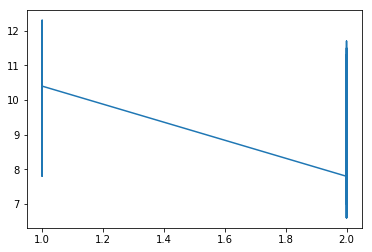

In [10]:
print("Confidence Interval:")
print("x2_bar - x1_bar = ", x2_bar - x1_bar, ", 95% CI ",stats.t.interval(0.95, df, loc=x2_bar-x1_bar, scale=se))
print("Cohen's Effect Size, d:")
print("d = ", (x2_bar - x1_bar)/sp)

rsq = t**2 / (t**2 + df)
print("r_squared = ", rsq) # 34.5 % of the variation between samples can be explained by the switch to nat. gas

# notice that the r_squared value above is equal to the r_squared value you would get from linear regression
x = np.concatenate((np.ones(N1), np.ones(N2)*2))
y = np.concatenate((x1,x2))

slope, yint, r, p, sterr = stats.linregress(x, y)
print("r_squared = ",r**2)

plt.plot(x,y)
plt.show()

## Paired samples (dependent/repeated measures) t-test with a null hypothesis that the mean difference is a specified constant (usually zero).
The average mass of acorns from the same N=30 trees downwind of a power plant is measured before (x<sub>1</sub>) and after (x<sub>2</sub>) the power plant converts from burning coal to buring natural gas. Does the mass of the acorns increase after the conversion from coal to natural gas? This will require a one-tail (on the low/left side) test.

* H<sub>0</sub>: x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0, that is , there is no difference between the sample means
* H<sub>A</sub>: x&#772;<sub>2</sub> - x&#772;<sub>1</sub> > 0
* &alpha; = 0.05

[t-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)
* degrees of freedom: d<sub>f</sub> = N-1 = 29
* t-critical for specified alpha level: t<sub>*</sub> = 1.677 (one-tailed, right-side)
* t-statistic: t = (x&#772;<sub>diff</sub> - 0)/(s<sub>diff</sub> / sqrt(N))
* standard deviation of difference: s<sub>d</sub> = sqrt(s<sub>1</sub><sup>2</sup>/N<sub>1</sub> + s<sub>2</sub><sup>2</sup>/N<sub>2</sub>)
* mean difference: x&#772;<sub>diff</sub> = x&#772;<sub>2</sub> - x&#772;<sub>1</sub>

In [11]:
# sample before conversion to nat. gas
x1 = np.array([10.8, 6.4, 8.3, 7.6, 11.4, 9.9, 10.6, 8.7, 8.1, 10.9,
      11.0, 11.8, 7.3, 9.6, 9.3, 9.9, 9.0, 9.5, 10.6, 10.3,
      8.8, 12.3, 8.9, 10.5, 11.6, 7.6, 8.9, 10.4, 10.2, 8.8])
# sample after conversion to nat. gas
x2 = np.array([10.1, 6.9, 8.6, 8.8, 12.1, 11.3, 12.4, 9.3, 9.3, 10.8,
      12.4, 11.5, 7.4, 10.0, 11.1, 10.6, 9.4, 9.5, 10.0, 10.0,
      9.7, 13.5, 9.6, 11.6, 11.7, 7.9, 8.6, 10.8, 9.5, 9.6])
N = len(x2)
xbar_diff = np.mean(x2) - np.mean(x1) # could also do np.mean(x2 - x1))
sdiff = np.std(x2-x1,ddof=1)
t = xbar_diff / (sdiff/np.sqrt(N))
print("t = ", t)

t, p = stats.ttest_rel(x2, x1) # using scipy
print("t = ", t, ", p = ", p/2) # divide by two because we are doing a one-tail test

d = xbar_diff / sdiff
print("d = ", d) # chohen's d

t =  3.9054390813265063
t =  3.905439081326491 , p =  0.0002584344912342189
d =  0.7130323606015934


So, there is a statistically significant difference between the two samples at the &alpha; = 0.05 level. 

